# Cluster Espacial

In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt
import requests

In [2]:
gdf = gpd.read_file("https://github.com/algarciach/AnalisisGeoespacial/raw/main/Covid19_model/Data/covid19_municipios_antioquia.gpkg")
gdf.info()

## K-means

## Agrupamiento Espacial (Regionalización)

In [5]:
var = ['altitud', 'densidad', 'humedad_relativa','temperatura']

In [6]:
from sklearn.preprocessing import StandardScaler
cat_std = StandardScaler().fit_transform(gdf[var])

In [7]:
from scipy.cluster.hierarchy import linkage, dendrogram
Z = linkage(cat_std, method='ward', metric='euclidean')

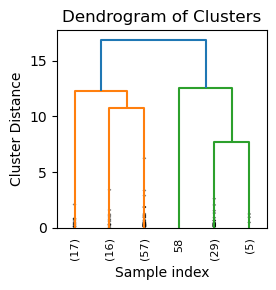

In [10]:
plt.figure(figsize=(3, 3))
plt.xlabel('Sample index')
plt.ylabel('Cluster Distance')
dendrogram(Z, leaf_rotation=90, leaf_font_size=8, color_threshold=0.2*83, truncate_mode='lastp', p=6, show_leaf_counts=True, show_contracted=True)
plt.title('Dendrogram of Clusters')
plt.tight_layout()


In [11]:
from sklearn import cluster
k4cls = cluster.KMeans(n_clusters=4).fit(cat_std)
gdf['kmeans4'] = k4cls.labels_

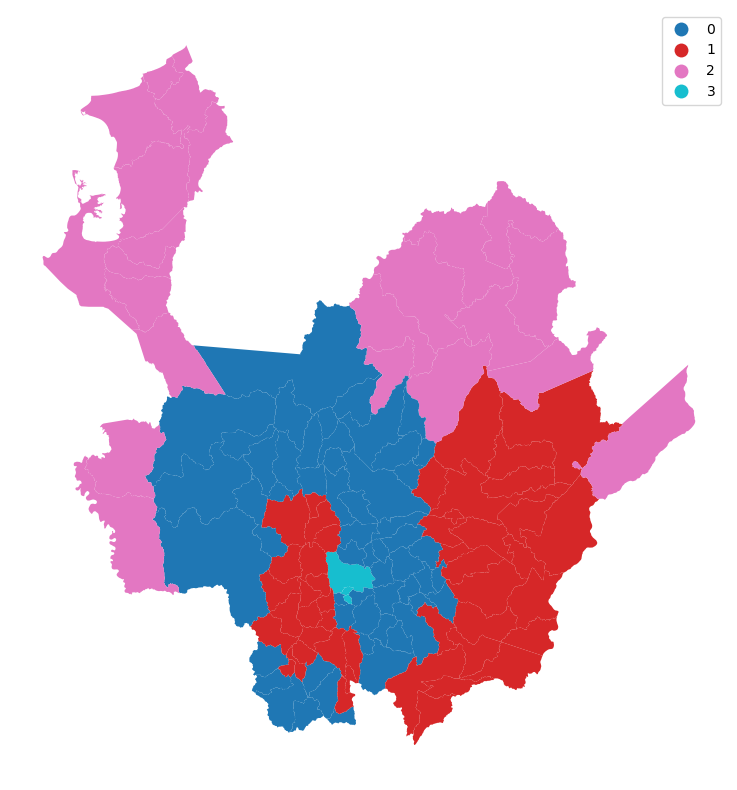

In [12]:
f, ax = plt.subplots(1, 1, figsize=(10, 10))
gdf.plot(column='kmeans4', categorical=True, linewidth=0, legend=True, ax=ax)
ax.set_axis_off()

<Axes: title={'center': 'densidad'}, xlabel='kmeans4'>

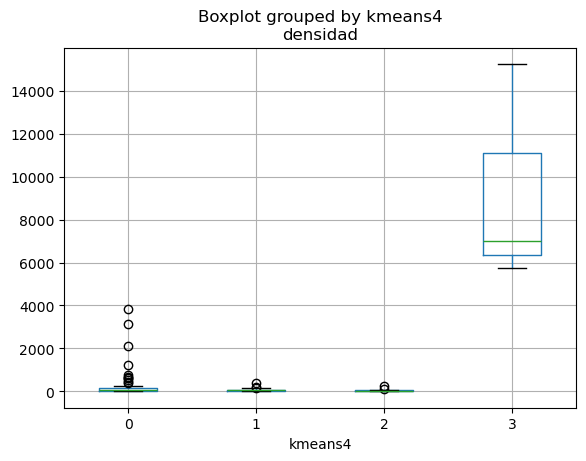

In [13]:
f, ax = plt.subplots()
gdf.boxplot(column='densidad', by='kmeans4', ax=ax)

In [14]:
from pysal.lib import weights

w_k4 = weights.distance.KNN.from_dataframe(gdf, k=6)

/usr/local/Caskroom/miniforge/base/envs/geo/lib/python3.11/site-packages/libpysal/weights/weights.py:1484: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  centroids = gdf.loc[neighbors].centroid
/usr/local/Caskroom/miniforge/base/envs/geo/lib/python3.11/site-packages/libpysal/weights/weights.py:1484: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  centroids = gdf.loc[neighbors].centroid
/usr/local/Caskroom/miniforge/base/envs/geo/lib/python3.11/site-packages/libpysal/weights/weights.py:1484: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  centroids = gdf.loc[neighbors].centroi

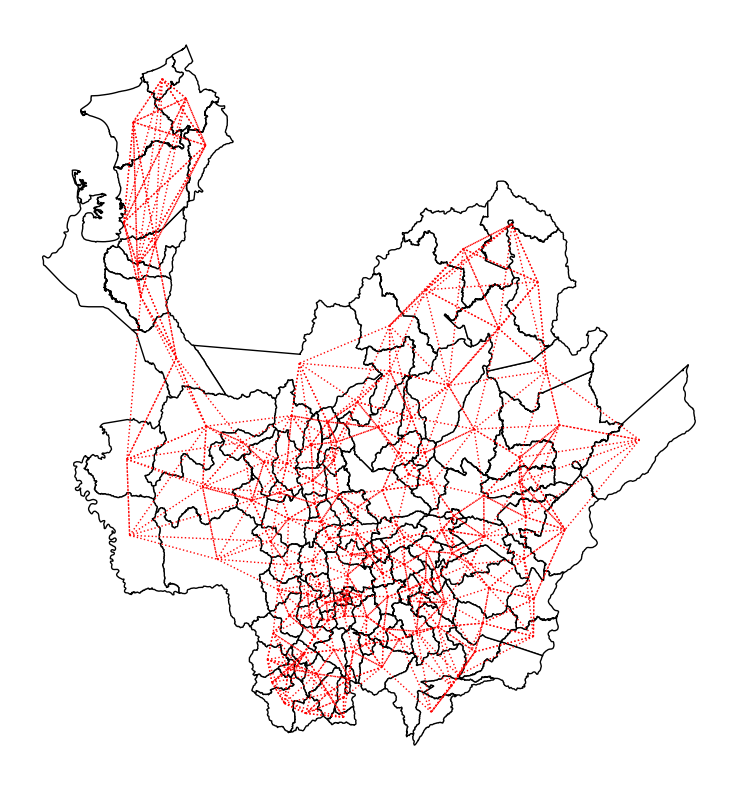

In [15]:
f, axs = plt.subplots(figsize=(10, 10))
ax = gdf.plot(edgecolor='k', facecolor='w', ax=axs)
w_k4.plot(gdf, ax=axs, edge_kws=dict(color='r', linestyle=':', linewidth=1), node_kws=dict(marker=''),)
axs.set_axis_off()


In [16]:
from sklearn.metrics.cluster import silhouette_score

cl_k4_wk4 = cluster.AgglomerativeClustering(n_clusters=4, connectivity=w_k4.sparse).fit(cat_std)
print(silhouette_score(cat_std, cl_k4_wk4.labels_))

0.2695634861781903


In [17]:
w_d30 = weights.DistanceBand.from_dataframe(gdf, 30000, binary=False)
cl_d30 = cluster.AgglomerativeClustering(n_clusters=4, connectivity=w_d30.sparse).fit(cat_std)
print(silhouette_score(cat_std,cl_d30.labels_))

0.3010860972076895


/usr/local/Caskroom/miniforge/base/envs/geo/lib/python3.11/site-packages/scipy/sparse/_data.py:128: RuntimeWarning: divide by zero encountered in reciprocal
  return self._with_data(data ** n)


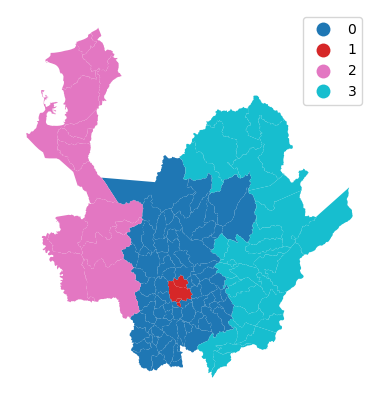

In [18]:
gdf['knn5'] = cl_k4_wk4.labels_
f, ax = plt.subplots(1, figsize=(5, 5))
gdf.plot(column='knn5', categorical=True, linewidth=0, legend=True, ax=ax)
ax.set_axis_off()